# Geometric transformations 

A geometric transform (image rotations or general warps) is a modification of the spatial relationship among pixels. 

<center>
<figure>
<img src="../img/1_geometric_transformation/Geom_1.png" style="height: 600; width: 600px;"/>
    <figcaption>Basic set of 2D geometric image transformations (planar transformations).</figcaption>
</figure>
</center>

Image warping involves modifying the domain of an image function. We can represent the operation for obtaining the transformed image with two steps:

* Coordinate trasform: $(x',y')=T\{(x,y)\}$
* Image mapping/resampling 

## Coordinate trasform:
Points in 2D can be expressed in **homogeneous coordinates**. In this way, we can represent transformations more compactly only with matrix multiplication. From 2D point to homogeneous coordinates:

$$\begin{equation} \begin{bmatrix} x \\ y \end{bmatrix} = \begin{bmatrix} \tilde{w}x \\ \tilde{w}y \\ \tilde{w} \end{bmatrix} = \begin{bmatrix} \tilde{x} \\ \tilde{y} \\ \tilde{w} \end{bmatrix}, \end{equation}$$

From homogeneous coordinates to 2D point: 

$$\begin{equation} \begin{bmatrix} \tilde{x} \\ \tilde{y} \\ \tilde{w} \end{bmatrix} = \begin{bmatrix} \tilde{x}/\tilde{w} \\ \tilde{y}/\tilde{w} \end{bmatrix}. \end{equation}$$

### Translation in homogeneous coords: 

* Translation: 

$$\begin{equation} \begin{bmatrix} x' \\ y' \end{bmatrix} = \begin{bmatrix} x \\ y \end{bmatrix} +  \begin{bmatrix} b_1 \\ b_2 \end{bmatrix}, \end{equation}$$

* Translation in hom coords: 

$$\begin{equation} \begin{bmatrix} x' \\ y'  \\ 1 \end{bmatrix} = \begin{bmatrix} 1 & 0 & b_1 \\ 0 & 1 & b_2 \\ 0 & 0 & 1 \end{bmatrix} \begin{bmatrix} x \\ y \\ 1 \end{bmatrix}, \end{equation}$$

* Yieldng: 

$$\begin{equation} \begin{bmatrix} x' \\ y'  \\ 1 \end{bmatrix} = \begin{bmatrix} 1 & 0 & b_1 \\ 0 & 1 & b_2 \\ 0 & 0 & 1 \end{bmatrix} \begin{bmatrix} x \\ y \\ 1 \end{bmatrix} = \begin{bmatrix} x+b_1\\ y+b_2\\ 1 \end{bmatrix} \end{equation}$$

### Affine transform

Is a geometric transformation that preserves point collinearity and distance ratios along a line. Affine transform can be interpreted as a linear transform followed by a translation. 

$$ \begin{equation} \begin{bmatrix} x' \\ y' \end{bmatrix} =A \begin{bmatrix} x \\ y \end{bmatrix} + \begin{bmatrix} b_1 \\ b_2 \end{bmatrix}, \end{equation}$$

Homogeneous coordinates: multiple operations combined into a single matrix multiplication

$$\begin{equation} \begin{bmatrix} x' \\ y'  \\ 1 \end{bmatrix} = T\begin{bmatrix} x' \\ y'  \\ 1 \end{bmatrix}  =  \begin{bmatrix} t_{1,1} & t_{1,2} & t_{1,3} \\ t_{2,1} & t_{2,2} & t_{2,3} \\ 0 & 0 & 1 \end{bmatrix} \begin{bmatrix} x \\ y \\ 1 \end{bmatrix}, \end{equation}$$

$[t_{1,1},t_{1,2},t_{2,1},t_{2,2}]$ represents the effect of the linear transformation (A), and $[t_{1,3},t_{2,3}]$ represents the effect of the traslation applied with vector $\begin{bmatrix} b_1 \\ b_2 \end{bmatrix}$ 
.
#### Examples of trasformations with homogeneous coordinates:

<br>
<br>
<center>
<figure>
<img src="../img/1_geometric_transformation/Geom_2.png" style="height: 800; width: 800px;"/>
    <figcaption></figcaption>
</figure>
</center>


## Image mapping/resampling

<br>
<br>
<center>
<figure>
<img src="../img/1_geometric_transformation/mapping.png" style="height: 600; width: 600px;"/>
    <figcaption></figcaption>
</figure>
</center>



## OpenCV Transformations

OpenCV provides two transformation functions, ***cv2.warpAffine*** and ***cv2.warpPerspective***, with which you can perform all kinds of transformations. ***cv2.warpAffine*** takes a 2x3 transformation matrix while ***cv2.warpPerspective*** takes a 3x3 transformation matrix as input.

In [2]:
# Libraries
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

### Scaling

Scaling is just resizing of the image. OpenCV comes with a function ***cv2.resize*** for this purpose. The size of the image can be specified manually, or you can specify the scaling factor. Different interpolation methods are used. Preferable interpolation methods are ***cv2.INTER_AREA*** for shrinking and ***cv2.INTER_CUBIC (slow)*** & ***cv2.INTER_LINEAR*** for zooming. By default, the interpolation method ***cv2.INTER_LINEAR*** is used for all resizing purposes. You can resize an input image with either methods. The scaling equation are represented in matrix form in homogeneus coordinates as:

$$\begin{equation} \begin{bmatrix} x' \\ y'  \\ 1 \end{bmatrix} = T\begin{bmatrix} x' \\ y'  \\ 1 \end{bmatrix}  =  \begin{bmatrix} f_x & 0 & 0 \\ 0 & f_y & 0 \\ 0 & 0 & 1 \end{bmatrix} \begin{bmatrix} x \\ y \\ 1 \end{bmatrix}, \end{equation}$$

The complete syntax for ***cv2.resize*** is given below:
<br>
<br>
`cv2.resize(src, dst, Size(), 0.5, 0.5, interpolation)`
* src: input image.
* dst: output image; it has the size dsize (when it is non-zero) or the size computed from src.size(), fx, and fy; the type of dst is the same as of src.
* dsize: output image size; if it equals to None, it is computed as: $dsize = Size(round(f_x\cdot src.cols(width)), round(f_y\cdot src.rows(height)))$ Either dsize or both fx and fy must be non-zero.
* $f_x$: scale factor along the horizontal axis
* $f_y$: scale factor along the vertical axis
* interpolation: interpolation method

In [3]:
img = cv2.imread('../img/ditto.jpeg',1)
print(f'Dimensions of image: {img.shape}') # (height, width)
height, width = img.shape[:2]

Dimensions of image: (430, 510, 3)


Dimensions of resized image: (860, 1020, 3)


(-0.5, 1019.5, 859.5, -0.5)

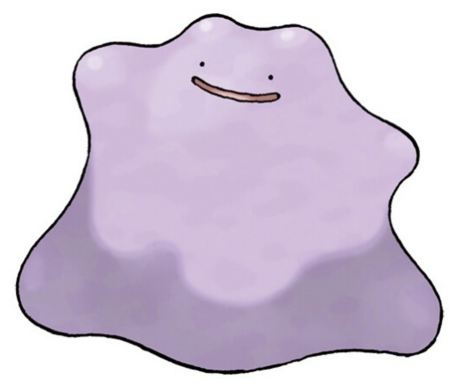

In [4]:
# double the dimensions of the image 
res = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)
# new dimensions 
print(f'Dimensions of resized image: {res.shape}')
# plot 
res_rgb = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)
plt.imshow(res_rgb)
plt.axis('off')

In [5]:
# alternative version (half the original dimensions)
res_2 = cv2.resize(img,None,fx=0.5, fy=0.5, interpolation = cv2.INTER_LINEAR)
print(f'Dimensions of resized image: {res_2.shape}')
# None represent the output image

Dimensions of resized image: (215, 255, 3)


In [9]:
# simple version (specific dimensions for the resized image)
img = cv2.imread('../img/ditto.jpeg',1)
print(img.shape)
img = cv2.resize(img, (600,500)) #(width,height)
print(img.shape)

(430, 510, 3)
(500, 600, 3)


### Translation
Translation is the shifting of an object's location. If you know the shift in the (x,y) direction and let it be ($t_x$,$t_y$), you can create the transformation matrix M (reduction of T matrix) as follows:

$$M=\begin{bmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y \end{bmatrix}$$

* Providing positive values for $t_x$ will shift the image to right and negative values will shift the image to the left.
* Similarly, positive values of $t_y$ will shift the image down while negative values will shift the image up.

You can make it into a Numpy array of type np.float32 and pass it into the cv.warpAffine() function.

Dimensions of traslated image: (430, 510, 3)


(-0.5, 509.5, 429.5, -0.5)

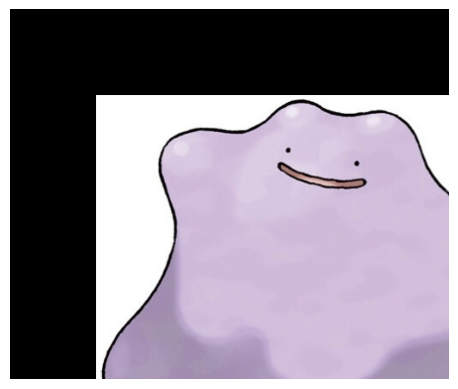

In [10]:
img = cv2.imread('../img/ditto.jpeg',1)
rows,cols = img.shape[:2]
# tx and ty values for translation
tx = 100
ty = 100
M = np.array([[1, 0, tx],[0, 1, ty]], dtype=np.float32)
# apply the translation to the image
dst = cv2.warpAffine(img,M,(cols,rows))
# plot 
print(f'Dimensions of traslated image: {dst.shape}')
dst_rgb = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.imshow(dst_rgb)
plt.axis('off')

The third argument of the ***cv2.warpAffine*** function is the size of the output image, which should be in the form of ***(width, height)***. Remember width = number of columns, and height = number of rows.

### Rotation
Rotation of an image for an angle $\theta$ is achieved by the transformation matrix of the form:

$$M=\begin{bmatrix} cos\theta & -sin\theta \\ sin\theta & cos\theta \end{bmatrix}$$

OpenCV provides the ability to define the center of rotation for the image and a scale factor to resize the image as well. In that case, the transformation matrix gets modified.

$$\begin{bmatrix} \alpha & \beta & (1-\alpha)\cdot c_x-\beta\cdot c_y \\ -\beta & \alpha & \beta\cdot c_x+(1-\alpha)\cdot c_y \end{bmatrix}$$

In the above matrix:

* $\alpha = scale \cdot cos\theta$
* $\beta = scale \cdot sin\theta$

where $c_x$ and $c_y$ are the coordinates along which the image is rotated. OpenCV provides the ***getRotationMatrix2D*** function to create the above transformation matrix. The following is the syntax for creating the 2D rotation matrix:
<br>
<br>
`getRotationMatrix2D(center, angle, scale)`
<br>
* ***center:*** the center of rotation for the input image,
* ***angle:*** the angle of rotation in degrees,
* ***scale:*** an isotropic scale factor which scales the image up or down according to the value provided, this can be a floating point value. For example, a value of 1.0 will keep the output image the same size as the source image. And a value of 2.0 will make the resulting image double the size of the source image

The function returns the 2D-rotation matrix, which will be used in the next step to rotate the image. If the angle is positive, the image gets rotated in the counter-clockwise direction. If you want to rotate the image clockwise by the same amount, then the angle needs to be negative.

#### Rotation is a three-step operation:

* First, you need to get the center of rotation. This typically is the center of the image you are trying to rotate.
* Next, create the 2D-rotation matrix. OpenCV provides the ***cv2.getRotationMatrix2D*** function that we discussed above. 
* Finally, apply the affine transformation to the image, using the rotation matrix you created in the previous step. The ***cv2.warpAffine*** function in OpenCV does the job.

The ***cv2.warpAffine*** function applies an affine transformation to the image. After applying affine transformation, all the parallel lines in the original image will remain parallel in the output image as well. The complete syntax for ***cv2.warpAffine*** is given below:
<br>
<br>
`warpAffine(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]])`
<br>
* src: the source mage
* M: the transformation matrix
* dsize: size of the output image
* dst: the output image
* flags: combination of interpolation methods such as INTER_LINEAR or INTER_NEAREST
* borderMode: the pixel extrapolation method
* borderValue: the value to be used in case of a constant border, has a default value of 0



Dimensions of rotated image: (430, 510, 3)


(-0.5, 509.5, 429.5, -0.5)

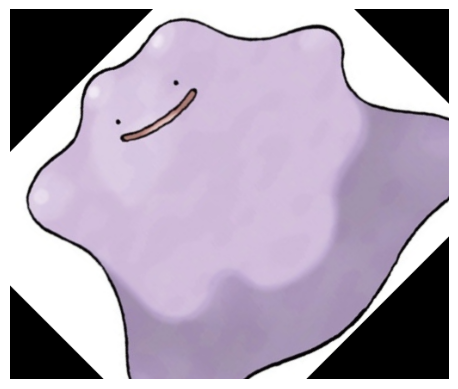

In [12]:
img = cv2.imread('../img/ditto.jpeg',1)
# Dividing height and width by 2 to get the center of the image
height, width = img.shape[:2]
center = (width/2, height/2)
M = cv2.getRotationMatrix2D(center=center, angle=45, scale=1)
# Rotate the image using cv2.warpAffine
rtd = cv2.warpAffine(src=img, M=M, dsize=(width, height))
# plot 
print(f'Dimensions of rotated image: {rtd.shape}')
rtd_rgb = cv2.cvtColor(rtd, cv2.COLOR_BGR2RGB)
plt.imshow(rtd_rgb)
plt.axis('off')

### Affine Transformation
* A transformation that can be expressed in the form of a matrix multiplication (linear transformation) followed by a vector addition (translation).
* From the above, we can use an Affine Transformation to express:

    * Rotations (linear transformation)
    * Translations (vector addition)
    * Scale operations (linear transformation)  
* In essence, an Affine Transformation represents a relation between two images.
* The usual way to represent an Affine Transformation is by using a 2×3 matrix. 

$$A = \begin{bmatrix} a_{0,0} & a_{0,1} \\ a_{1,0} & a_{1,1}\end{bmatrix}, \;\; B=\begin{bmatrix} b_{0,0} \\ b_{1,0}\end{bmatrix}$$

$$ M = [A \;B] =  \begin{bmatrix} a_{0,0} & a_{0,1} & b_{0,0} \\ a_{1,0} & a_{1,1} & b_{1,0}\end{bmatrix}$$

Considering that we want to transform a 2D vector $X = \begin{bmatrix} x \\ y \end{bmatrix}$, by using A and B, we can do the same with:

$$T=A \begin{bmatrix} x \\ y \end{bmatrix} + B = M\cdot[x,y,1]^T$$ 

$$ T= \begin{bmatrix} a_{0,0}x + a_{0,1}y + b_{0,0} \\ a_{1,0}x + a_{1,1}y + b_{1,0}\end{bmatrix}$$

In affine transformation, all parallel lines in the original image will still be parallel in the output image. To find the transformation matrix, we need three points from the input image and their corresponding locations in the output image. Then ***cv2.getAffineTransform*** will create a 2x3 matrix which is to be passed to ***cv2.warpAffine***.

(-0.5, 509.5, 429.5, -0.5)

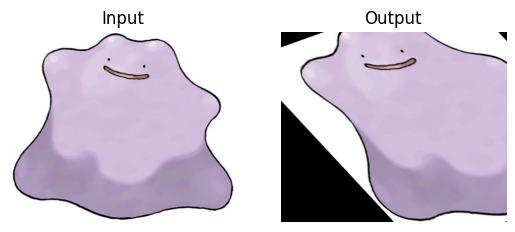

In [13]:
img = cv2.imread('../img/ditto.jpeg',1)
rows,cols,ch = img.shape
#  three points and their corresponding locations in the output image
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[150,50],[150,250]])
M = cv2.getAffineTransform(pts1,pts2)
dst = cv2.warpAffine(img,M,(cols,rows))
# plot 
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
dst_rgb = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.subplot(121),plt.imshow(img_rgb),plt.title('Input')
plt.axis('off')
plt.subplot(122),plt.imshow(dst_rgb),plt.title('Output')
plt.axis('off')

#### Rotating the image after Warp

(-0.5, 509.5, 429.5, -0.5)

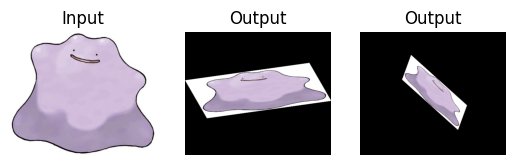

In [14]:
rows,cols,ch = img.shape
#  three points and their corresponding locations in the output image
pts1 = np.array( [[0, 0], [img.shape[1] - 1, 0], [0, img.shape[0] - 1]] ).astype(np.float32)
pts2 = np.array( [[0, img.shape[1]*0.33], [img.shape[1]*0.85, img.shape[0]*0.25], [img.shape[1]*0.15, img.shape[0]*0.7]] ).astype(np.float32)
M = cv2.getAffineTransform(pts1,pts2)
dst = cv2.warpAffine(img,M,(cols,rows))
# rotating 
center = (dst.shape[1]//2, dst.shape[0]//2) # (width, height)
angle = -50
scale = 0.6
rot_mat = cv2.getRotationMatrix2D( center, angle, scale )
dst_rot = cv2.warpAffine(dst, rot_mat, (dst.shape[1], dst.shape[0])) # (width, height)
# plot 
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
dst_rgb = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
dst_rot_rgb = cv2.cvtColor(dst_rot, cv2.COLOR_BGR2RGB)
plt.subplot(131),plt.imshow(img_rgb),plt.title('Input')
plt.axis('off')
plt.subplot(132),plt.imshow(dst_rgb),plt.title('Output')
plt.axis('off')
plt.subplot(133),plt.imshow(dst_rot_rgb),plt.title('Output')
plt.axis('off')

### Perspective Transformation
For perspective transformation, you need a 3x3 transformation matrix. Straight lines will remain straight even after the transformation. To find this transformation matrix, you need 4 points on the input image and corresponding points on the output image. Among these 4 points, 3 of them should not be collinear. Then the transformation matrix can be found by the function ***cv2.getPerspectiveTransform***. Then apply ***cv2.warpPerspective*** with this 3x3 transformation matrix.

(-0.5, 509.5, 429.5, -0.5)

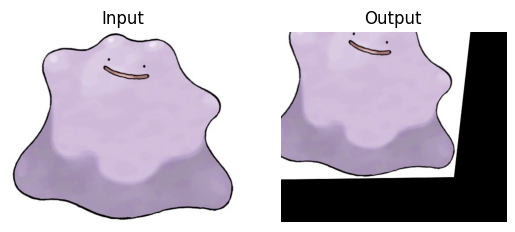

In [16]:
img = cv2.imread('../img/ditto.jpeg',1)
rows,cols,ch = img.shape
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img,M,(img.shape[1],img.shape[0]))
# plot 
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
dst_rgb = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.subplot(121),plt.imshow(img_rgb),plt.title('Input')
plt.axis('off')
plt.subplot(122),plt.imshow(dst_rgb),plt.title('Output')
plt.axis('off')

## References
 
* [image processing and computer vision by Rein van den Boomgaard](https://staff.fnwi.uva.nl/r.vandenboomgaard/IPCV20162017/LectureNotes/IP/GeometricalOperators/index.html#forward-transform)
* [Geometric Transformations of Images by OpenCV doc.](https://docs.opencv.org/3.4/da/d6e/tutorial_py_geometric_transformations.html)
* [image rotation and translation using opencv](https://learnopencv.com/image-rotation-and-translation-using-opencv/)
* [Computer Vision: Algorithms and Applications by Richard Szeliski](https://www.cs.ccu.edu.tw/~damon/tmp/SzeliskiBook_20100903_draft.pdf)